In [28]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import skimage.morphology
import skimage.feature
import math
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure

(2, 512, 512)
uint16


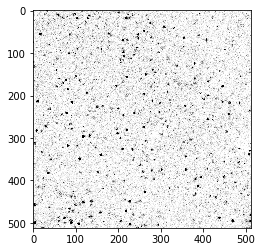

In [7]:
img = skimage.io.imread('112619_OGD_Treated_PI_5regions_nonRGB_XY2.tif')
print(img.shape)
print(img.dtype)
imgplot = plt.imshow(img[0,:,:], cmap='Greys')
plt.show()

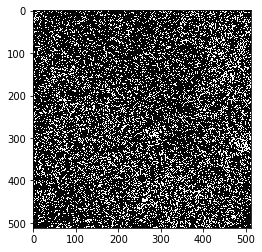

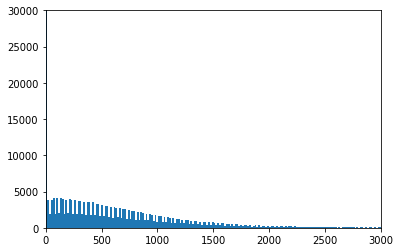

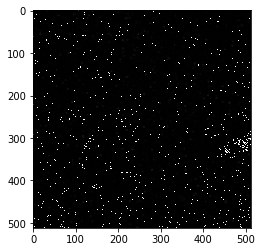

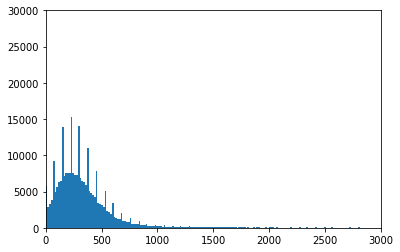

In [8]:
DAPI = img[0]
PI = img[1]

DAPIplot = plt.imshow(1-DAPI, cmap='Greys')
plt.show()
plt.hist(DAPI.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PIplot = plt.imshow(1-PI, cmap='Greys')
plt.show()
plt.hist(PI.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()

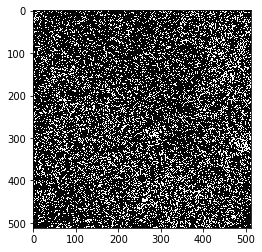

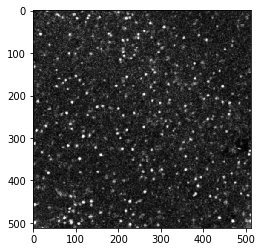

In [9]:
DAPI_filtered = ndi.gaussian_filter(DAPI, sigma=1)
DAPIplot = plt.imshow(1-DAPI, cmap='Greys')
plt.show()
filteredplot = plt.imshow(1-DAPI_filtered, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_yen
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1141aaf98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1140510b8>], dtype=object))

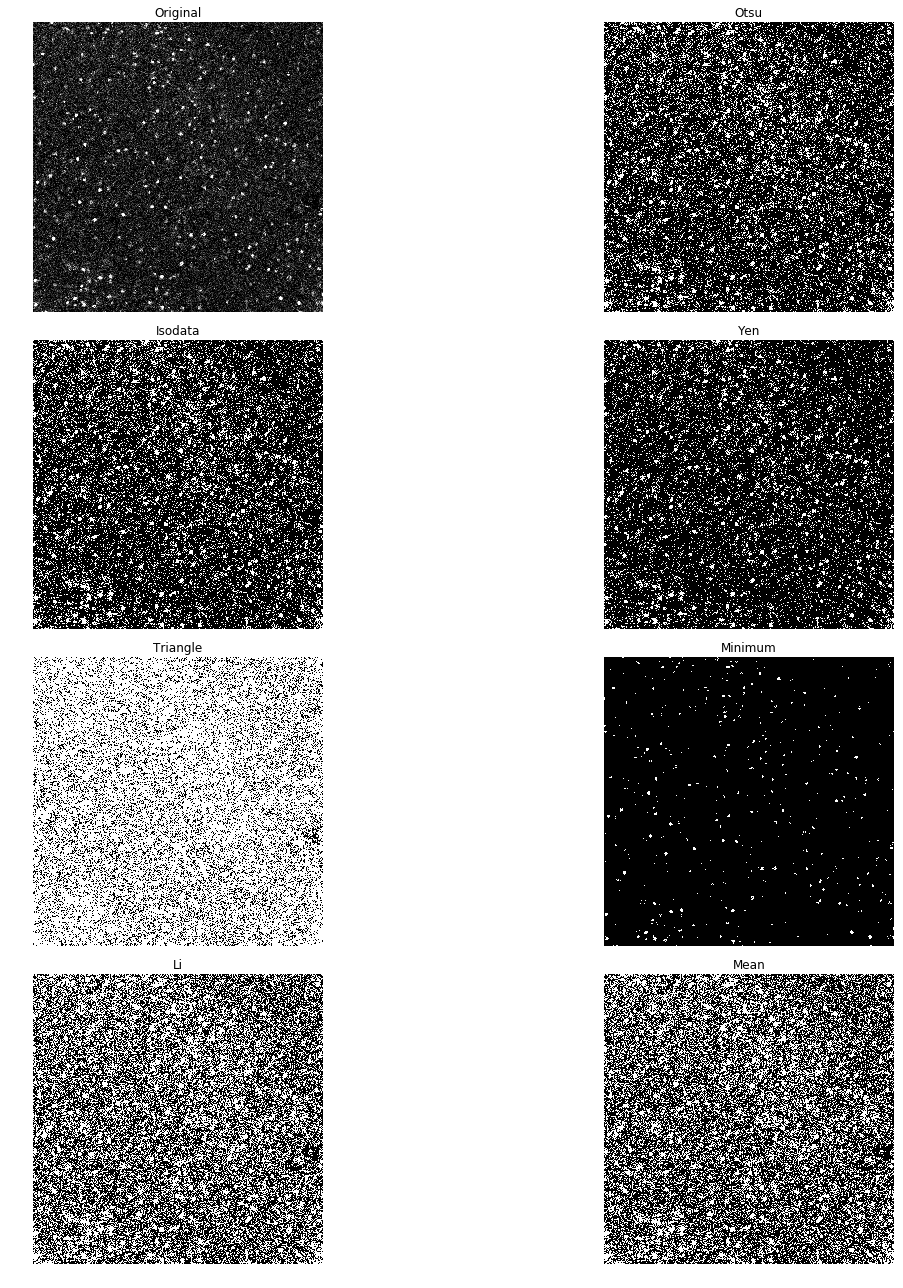

In [10]:
try_all_threshold(DAPI, figsize=(20,18))

skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_yen
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x113dca630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113cf8d30>], dtype=object))

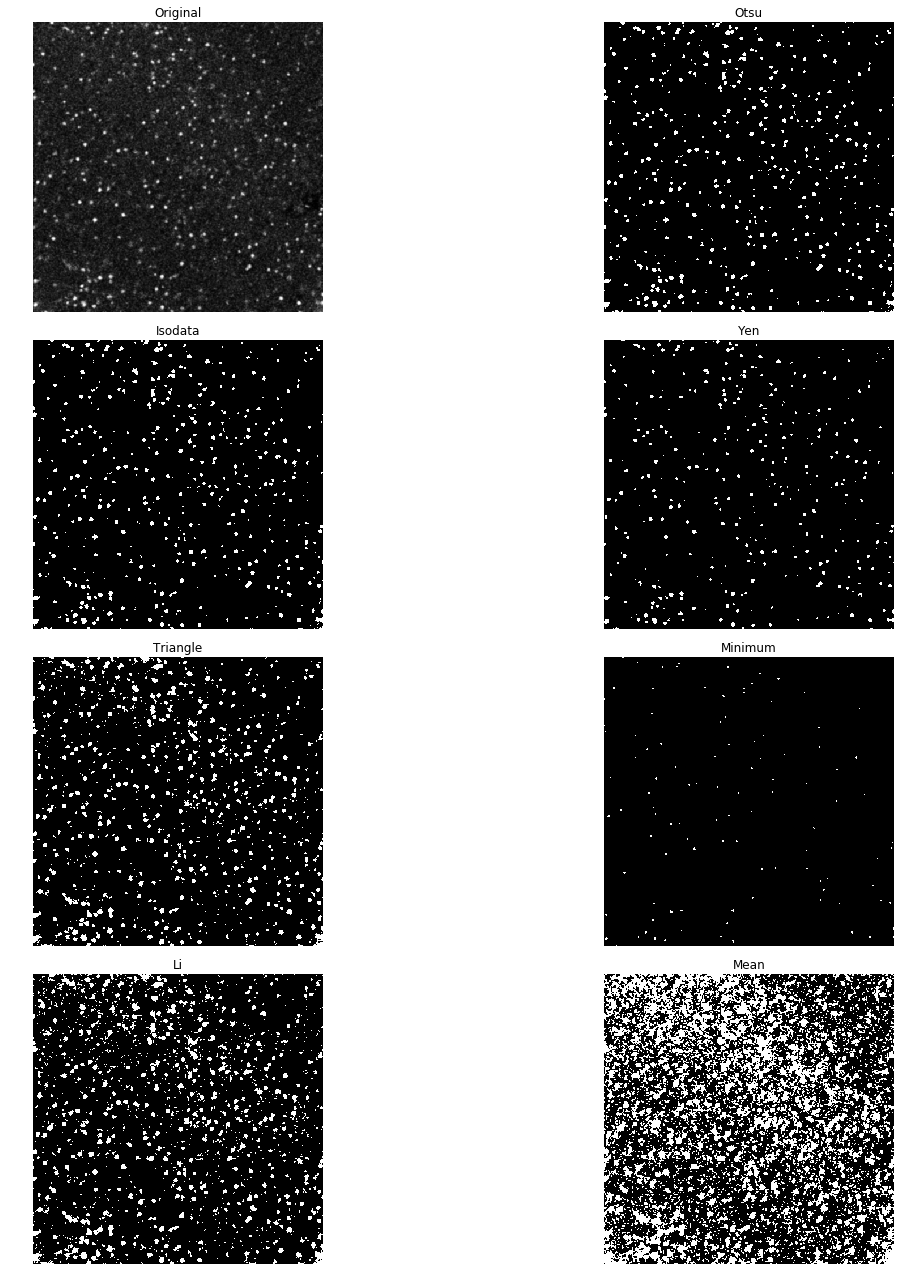

In [11]:
try_all_threshold(DAPI_filtered, figsize=(20,18))

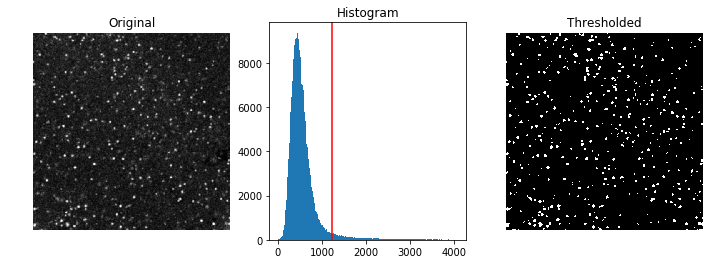

In [12]:
DAPI_thresh = skimage.filters.threshold_otsu(DAPI_filtered)
DAPI_binary = DAPI_filtered > DAPI_thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(DAPI_filtered, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(DAPI_filtered.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(DAPI_thresh, color='r')

ax[2].imshow(DAPI_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

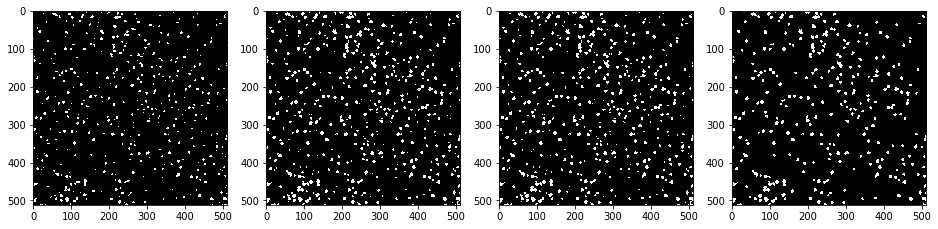

In [13]:
DAPI_dilation = skimage.morphology.binary_dilation(DAPI_binary)
DAPI_filled_holes = ndi.binary_fill_holes(DAPI_dilation)
DAPI_clean = skimage.morphology.remove_small_objects(DAPI_filled_holes, min_size=30)


fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(DAPI_binary, cmap=plt.cm.gray)
ax[1].imshow(DAPI_dilation, cmap=plt.cm.gray)
ax[2].imshow(DAPI_filled_holes, cmap=plt.cm.gray)
ax[3].imshow(DAPI_clean, cmap=plt.cm.gray)
plt.show()

In [14]:
log_blobs = skimage.feature.blob_log(DAPI_clean)
dog_blobs = skimage.feature.blob_dog(DAPI_clean)
doh_blobs = skimage.feature.blob_doh(DAPI_clean)

log_blobs[:, 2] = log_blobs[:, 2] * sqrt(1.5)
dog_blobs[:, 2] = dog_blobs[:, 2] * sqrt(1.5)
doh_blobs[:, 2] = doh_blobs[:, 2] * sqrt(1.5)

In [16]:
print(len(log_blobs))

492


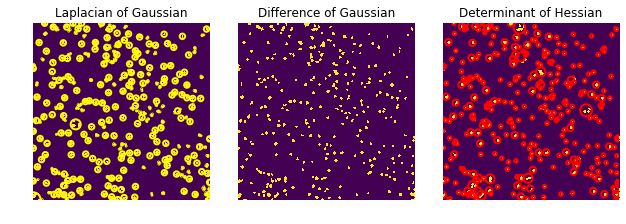

492 0 359


In [17]:
blobs_list = [log_blobs, dog_blobs, doh_blobs]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(DAPI_clean)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

print(len(log_blobs), len(dog_blobs), len(doh_blobs))

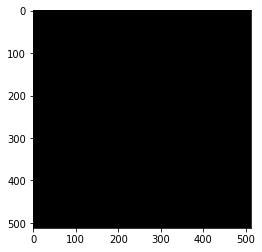

In [18]:
# Pretty sure the reason the difference of gaussian filter isn't working is because the image is binary.. not positive on this yet though
double_gauss = ndi.gaussian_filter(DAPI_clean, sigma=1)
double_gauss_plot = plt.imshow(1-double_gauss, cmap='Greys')
plt.show()

In [31]:
labeled_DAPI, _ = ndi.label(DAPI_clean)
DAPI_props = measure.regionprops(labeled_DAPI)

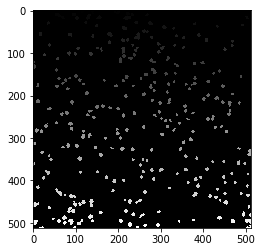

In [32]:
plt.imshow(labeled_DAPI, cmap=plt.cm.gray)
plt.show()

512
281
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [24]:
log_blobs = skimage.feature.blob_log(DAPI)
dog_blobs = skimage.feature.blob_dog(1-DAPI)
doh_blobs = skimage.feature.blob_doh(DAPI)

log_blobs[:, 2] = log_blobs[:, 2] * sqrt(2)
dog_blobs[:, 2] = dog_blobs[:, 2] * sqrt(2)

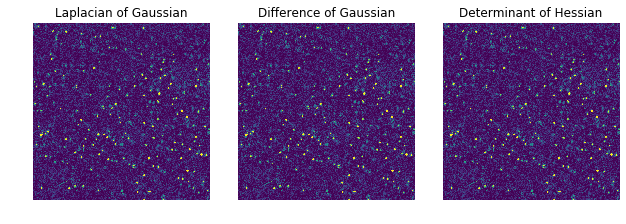

In [25]:
blobs_list = [log_blobs, dog_blobs, doh_blobs]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(DAPI)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [30]:
print(doh_blobs.shape)

(253, 3)


In [119]:
PI.sum()/len(doh_blobs)

295119.53921568627